In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt


The one-dimensional Burger's equation is given by:

∂u/∂t + u * ∂u/∂x = ν * ∂²u/∂x²

Where:
- u is the velocity field
- ν is the kinematic viscosity


In [2]:
# Generate the training data

x = np.linspace(0, 1, 1000)
t = np.linspace(0, 1, 1000)
X, T = np.meshgrid(x, t)

X_flat = X.flatten()[:, None]
T_flat = T.flatten()[:, None]

# Parameters
nu = 0.01 
u0 = -np.sin(np.pi * X_flat)


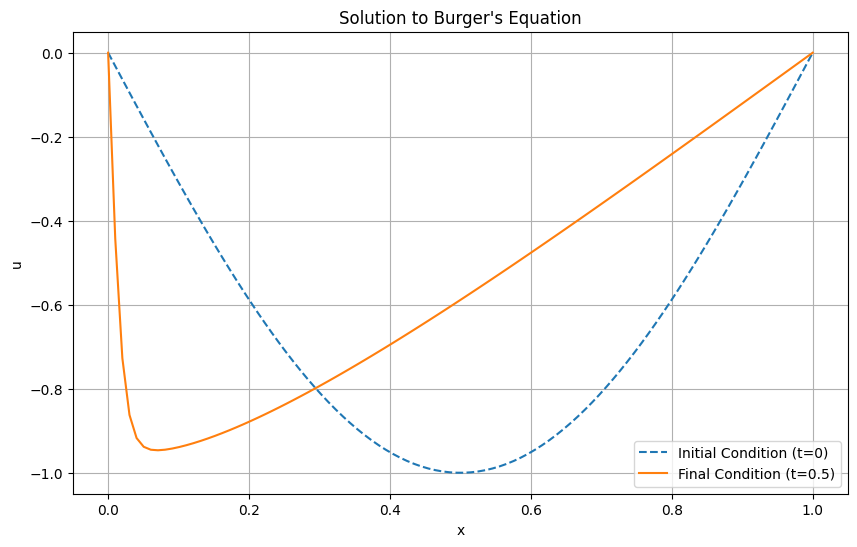

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
nu = 0.01  # Kinematic viscosity
L = 1.0    # Length of the domain
T = 0.5    # Time to simulate
nx = 100    # Number of spatial points
nt = 1000   # Number of time steps
dx = L / (nx - 1)  # Spatial step
dt = T / nt        # Time step

# Create spatial grid
x = np.linspace(0, L, nx)

# Initial condition: u(x, 0) = -sin(pi * x)
u_initial = -np.sin(np.pi * x)
# Initialize u
u = u_initial.copy()

# Time-stepping loop
for n in range(nt):
    un = u.copy()
    for i in range(1, nx - 1):
        u[i] = (un[i] - un[i] * dt / (2 * dx) * (un[i + 1] - un[i - 1]) +
                nu * dt / dx**2 * (un[i + 1] - 2 * un[i] + un[i - 1]))

# Final u after time T
u_final = u
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x, u_initial, label='Initial Condition (t=0)', linestyle='--')
plt.plot(x, u_final, label='Final Condition (t=0.5)')
plt.title("Solution to Burger's Equation")
plt.xlabel("x")
plt.ylabel("u")
plt.legend()
plt.grid()
plt.show()


In [10]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(2,)),
        tf.keras.layers.Dense(50, activation='tanh'),
        tf.keras.layers.Dense(50, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    return model

def loss_function(model, X, T, u0):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(X)
        tape.watch(T)
        u_pred = model(tf.concat([X, T], 1))

        u_t = tape.gradient(u_pred, T)
        u_x = tape.gradient(u_pred, X)
        u_xx = tape.gradient(u_x, X)

    # Burger's equation residual
    residual = u_t + u_pred * u_x - nu * u_xx

    # Initial condition
    initial_condition_loss = tf.reduce_mean(tf.square(model(tf.concat([X, T], 1)) - u0))

    return tf.reduce_mean(tf.square(residual)) + initial_condition_loss


In [11]:
model = create_model()
optimizer = tf.keras.optimizers.Adam()

# Training loop
epochs = 10000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_function(model, X_flat, T_flat, u0)
    
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')



c:\Users\sysad\Project\PINN\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


ValueError: Passed in object [[0.      ]
 [0.001001]
 [0.002002]
 ...
 [0.997998]
 [0.998999]
 [1.      ]] of type 'ndarray', not tf.Tensor or tf.Variable or ExtensionType.